In [ ]:
#Problem 1 - Data Exploration and Understanding:
#Dataset Overview
import pandas as pd
file_path = '/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

#1
print("The first 10 rows:")
print(df.head(10))

#2
rows, columns = df.shape
print(f"\nNumber of rows: {rows}")
print(f"Number of columns: {columns}")

#3
print("\nColumns and their data types:")
print(df.dtypes)

The first 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    

In [ ]:
#Basic Statistics
#1
print("Mean: ", df['score'].mean())
print("Median: ", df['score'].median())
print("Standard Deviation: ", df['score'].std())

#2
print(f"\nCountry with highest happiness score:", df.loc[df['score'].idxmax(), 'Country name'])
print(f"Country with lowest happiness score:", df.loc[df['score'].idxmin(), 'Country name'])

Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995

Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


In [ ]:
#Missing Values:
#displaying the total count for each column
print("Missing values count for each column:", df.isnull().sum())

Missing values count for each column: Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Filtering and Sorting:
filtered_df = df[df['score'] > 7.5]
print("Filtered Dataset:\n", filtered_df)

#sorting the filtered dataset by 'Log GDP per capita' in descending order and displaying the top 10 rows
top_10 = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries by GDP per capita:\n", top_10.head(10))

Filtered Dataset:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries by GDP per capita:
   Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.

In [ ]:
#Adding New Columns:
import numpy as np
conditions = [
    (df['score'] < 4),
    (df['score'] >= 4) & (df['score'] <= 6),
    (df['score'] > 6)
]
categories = ['Low', 'Medium', 'High']

#creating the new column
df['Happiness Category'] = np.select(conditions, categories, default='Unknown')
print(df[['Country name', 'score', 'Happiness Category']])

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


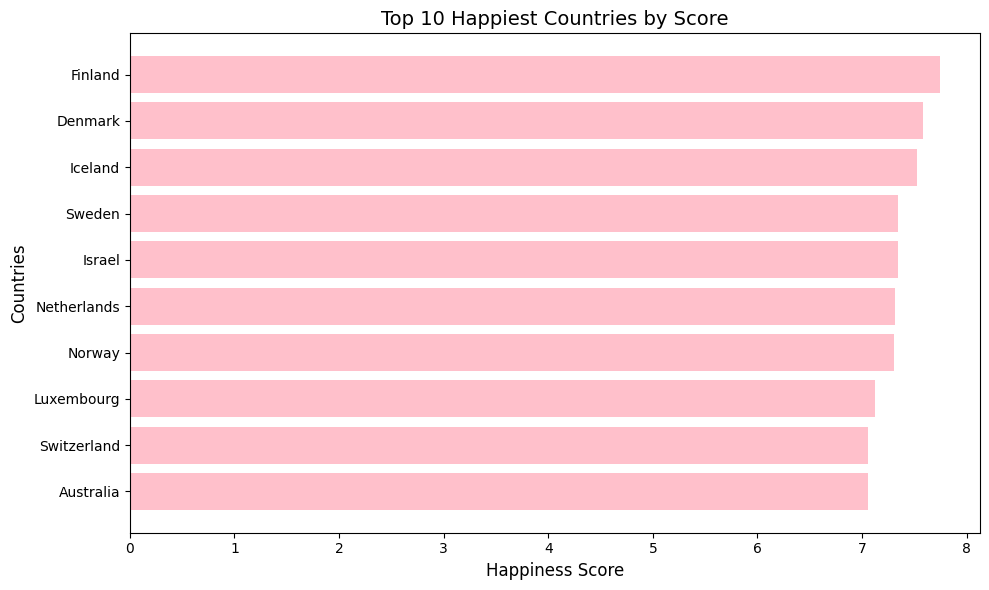

In [ ]:
#Data Visualizations:
#Bar plot:
import matplotlib.pyplot as plt

#sorting the DataFrame by 'Score' in descending order and selecting the top 10
top_happiest = df.sort_values(by='score', ascending=False).head(10)

#creating the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_happiest['Country name'], top_happiest['score'], color='pink')

#labels and title
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.title('Top 10 Happiest Countries by Score', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

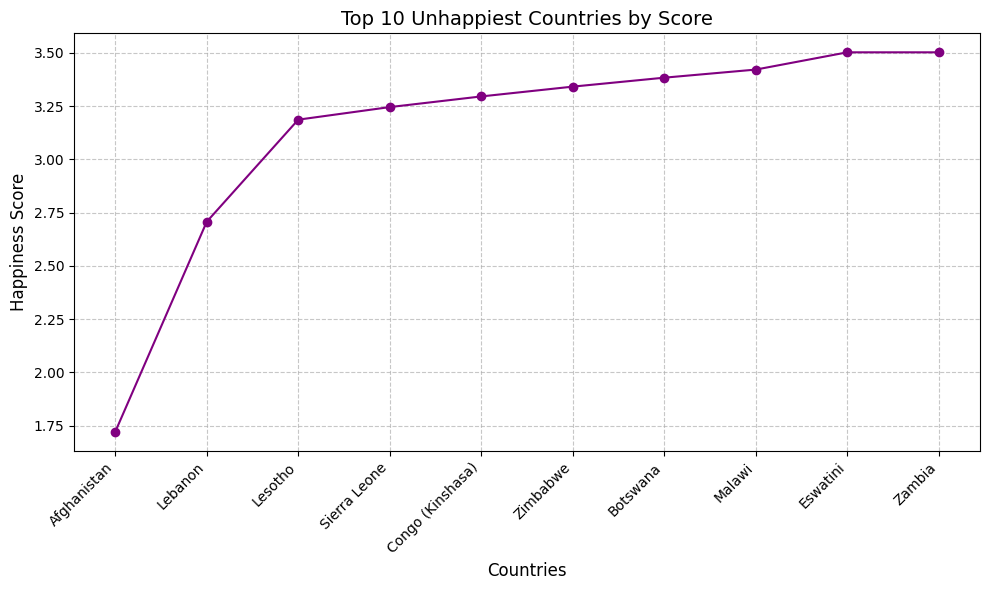

In [ ]:
#Line Plot:
import matplotlib.pyplot as plt

top_unhappiest = df.sort_values(by='score').head(10)

#creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_unhappiest['Country name'], top_unhappiest['score'], marker='o', linestyle='-', color='purple')

#abels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Unhappiest Countries by Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

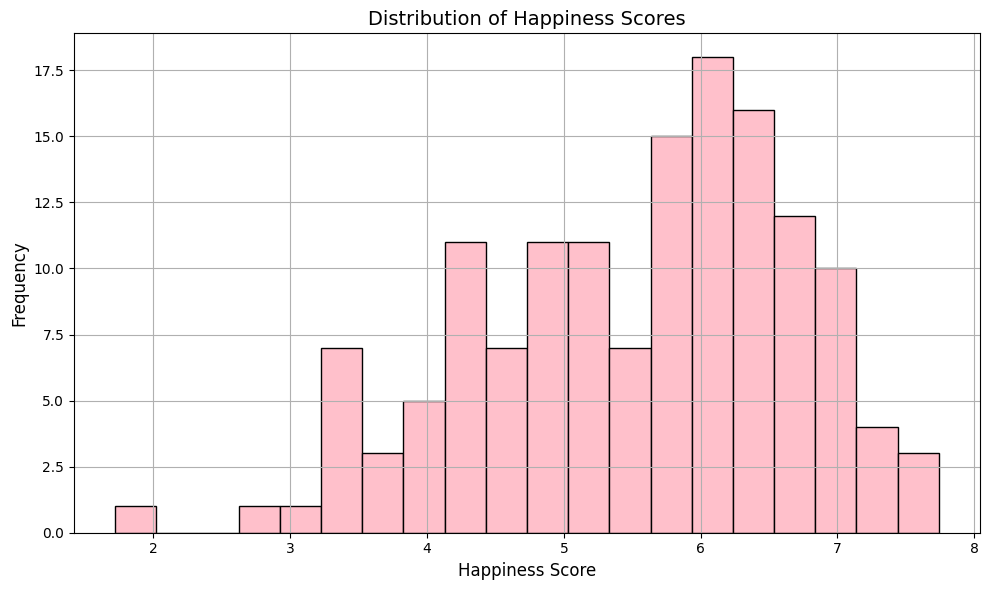

In [ ]:
#histogram
import matplotlib.pyplot as plt

#creating the histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='pink', edgecolor='black')

#abels and title
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

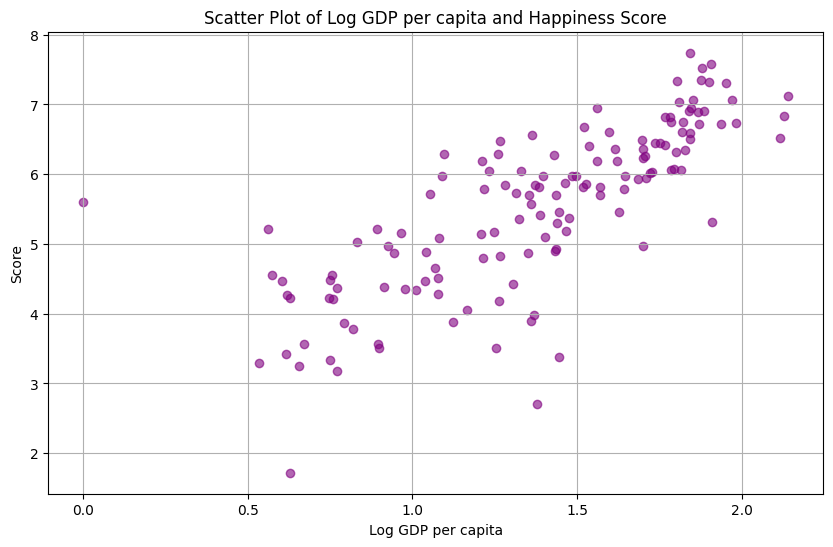

In [ ]:
#Scatter Plot:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Log GDP per capita and Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
#Problem 2 - Some Advance Data Exploration Task:
#Task 1
import pandas as pd

file_path = '/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#filtering the dataset for South Asian countries
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

#display the filtered dataset
print("South Asian Countries Dataset:\n", south_asian_df)

#saving the filtered DataFrame to a CSV file
south_asian_df.to_csv('/content/drive/MyDrive/Assignment/south_asian_happiness.csv', index=False)
print("Filtered data has been saved to '/content/drive/MyDrive/Assignment/south_asian_happiness.csv'")

South Asian Countries Dataset:
     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Pe

South Asian Countries Ranked by Composite Score:

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


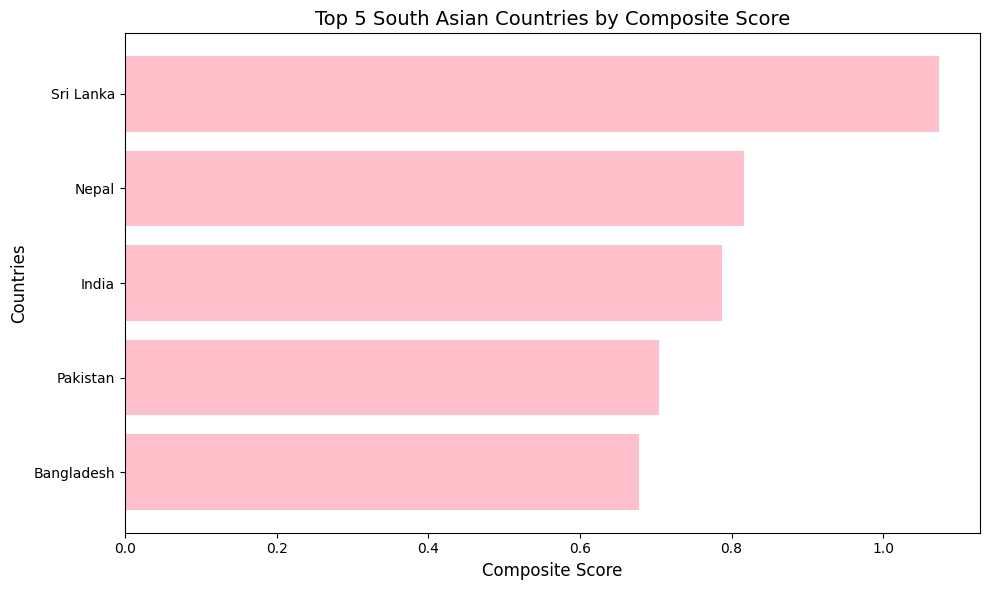

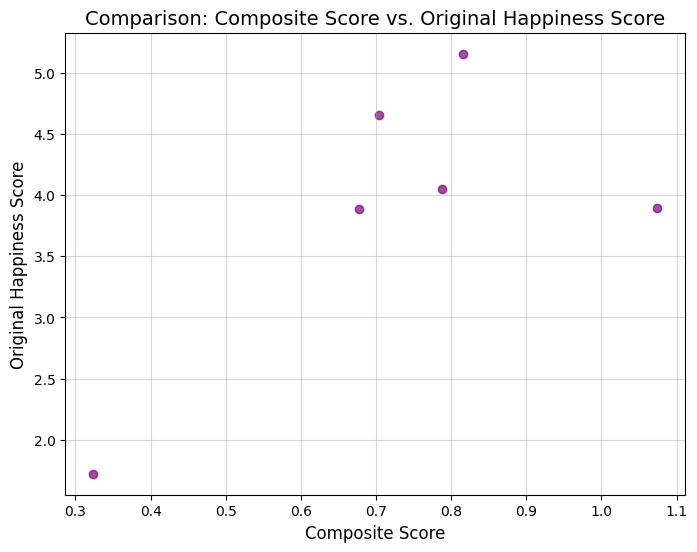


Discussion:
The Composite Score rankings may not completely match the Original Happiness Score
because the Composite Score is based only on specific factors like Log GDP per capita,
Social support, and Healthy life expectancy. Other factors that affect the Original
Happiness Score, such as freedom and generosity, are not included in the calculation.
The scatter plot shows how the two scores are related, allowing us to observe any
patterns or differences.



In [ ]:
#Task 2
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

#creating the Composite Score
south_asian_df.loc[:,'Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)

#ranking the South Asian countries based on the Composite Score
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)
print("South Asian Countries Ranked by Composite Score:\n")
print(south_asian_df[['Country name', 'Composite Score']])

#visualizing the top 5 countries
top_5_countries = south_asian_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='pink')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#comparing Composite Score rankings with Original Happiness Score
plt.figure(figsize=(8, 6))
plt.scatter(south_asian_df['Composite Score'], south_asian_df['score'], color='purple', alpha=0.7)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Original Happiness Score', fontsize=12)
plt.title('Comparison: Composite Score vs. Original Happiness Score', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

#discussion
print("""
Discussion:
The Composite Score rankings may not completely match the Original Happiness Score
because the Composite Score is based only on specific factors like Log GDP per capita,
Social support, and Healthy life expectancy. Other factors that affect the Original
Happiness Score, such as freedom and generosity, are not included in the calculation.
The scatter plot shows how the two scores are related, allowing us to observe any
patterns or differences.
""")


Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


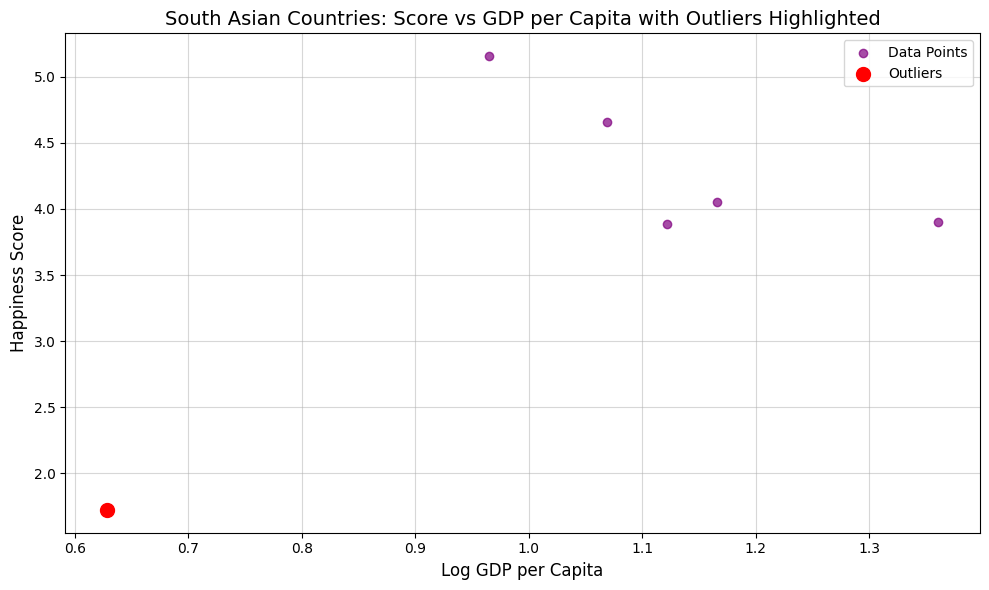

In [ ]:
#Task 3
#1
import pandas as pd
import matplotlib.pyplot as plt

#calculate the IQR for Score
score_Q1 = south_asian_df['score'].quantile(0.25)
score_Q3 = south_asian_df['score'].quantile(0.75)
IQR_score = score_Q3 - score_Q1

#calculating the IQR for GDP per Capita
gdp_Q1 = south_asian_df['Log GDP per capita'].quantile(0.25)
gdp_Q3 = south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = gdp_Q3 - gdp_Q1

#defining the lower and upper bounds
score_lower_bound = score_Q1 - 1.5 * IQR_score
score_upper_bound = score_Q3 + 1.5 * IQR_score
gdp_lower_bound = gdp_Q1 - 1.5 * IQR_gdp
gdp_upper_bound = gdp_Q3 + 1.5 * IQR_gdp

#identify outliers
outliers_score = south_asian_df[(south_asian_df['score'] < score_lower_bound) | (south_asian_df['score'] > score_upper_bound)]
outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < gdp_lower_bound) | (south_asian_df['Log GDP per capita'] > gdp_upper_bound)]

#combine outliers
outliers_combined = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

print("Outliers based on Score:")
print(outliers_score[['Country name', 'score']])
print("\nOutliers based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='purple', alpha=0.7, label='Data Points')
plt.scatter(outliers_combined['Log GDP per capita'], outliers_combined['score'],
            color='red', s=100, label='Outliers')

#labels and title
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('South Asian Countries: Score vs GDP per Capita with Outliers Highlighted', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Discussion:

 Outliers are countries with happiness scores or GDP that are much higher or lower than most others in the region. These outliers can distort regional averages, making them less accurate. For example, Sri Lanka has a high happiness score but low GDP, showing that factors like life expectancy matter more than wealth. Conversely, Afghanistan has a high GDP but low happiness, indicating that economic wealth doesn't guarantee well-being.

 Impact on Regional Averages: Outliers can affect the average, making it higher or lower than it should be. Scatter plots can help spot these differences. Understanding outliers can help create better policies, like improving the economy in countries with high GDP but low happiness or focusing on well-being in countries with low GDP but high happiness.

Correlation between 'score' and 'Freedom to make life choices': 0.8005185224163315
Correlation between 'score' and 'Generosity': 0.874512371253192


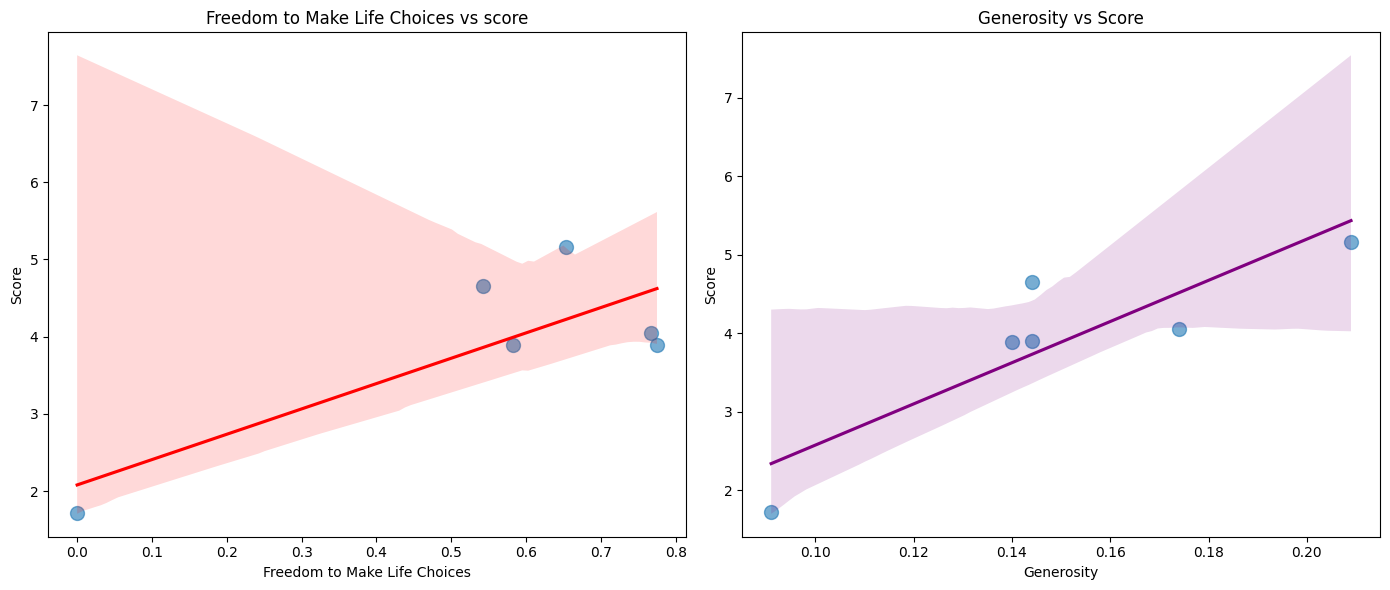

In [ ]:
#Task4
#1
freedom_correlation = south_asian_df['score'].corr(south_asian_df['Freedom to make life choices'])
generosity_correlation = south_asian_df['score'].corr(south_asian_df['Generosity'])
print(f"Correlation between 'score' and 'Freedom to make life choices': {freedom_correlation}")
print(f"Correlation between 'score' and 'Generosity': {generosity_correlation}")

#2
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))

#plotting the scatter plot with trendline for Freedom to Make Life Choices vs Score
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'s': 100, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Freedom to Make Life Choices vs score")
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

#plotting the scatter plot with trendline for Generosity vs Score
plt.subplot(1, 2, 2)  # This will create the second subplot
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'s': 100, 'alpha': 0.6}, line_kws={'color': 'purple'})
plt.title("Generosity vs Score")
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

#3
To identify and discuss the strongest and weakest relationships between the metrics (Freedom to Make Life Choices, Generosity) and the Score for South Asian countries, the Pearson correlation coefficients calculated will be referenced. This is how they can be interpreted:

Strongest Relationship: "Freedom to Make Life Choices" shows a strong positive connection with the Score, meaning that having more personal freedom and choice greatly affects happiness and well-being in South Asian countries. This is likely because of factors such as empowerment, living standards, and social-political conditions.

Weakest Relationship: "Generosity" has a weak positive connection with the Score, meaning that while being generous may help build social bonds, it doesn't have a big effect on individual happiness in South Asia. Other factors like financial stability, political freedom, and access to healthcare are likely more important.

Ranked by GDP-Score (Ascending):
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Ranked by GDP-Score (Descending):
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


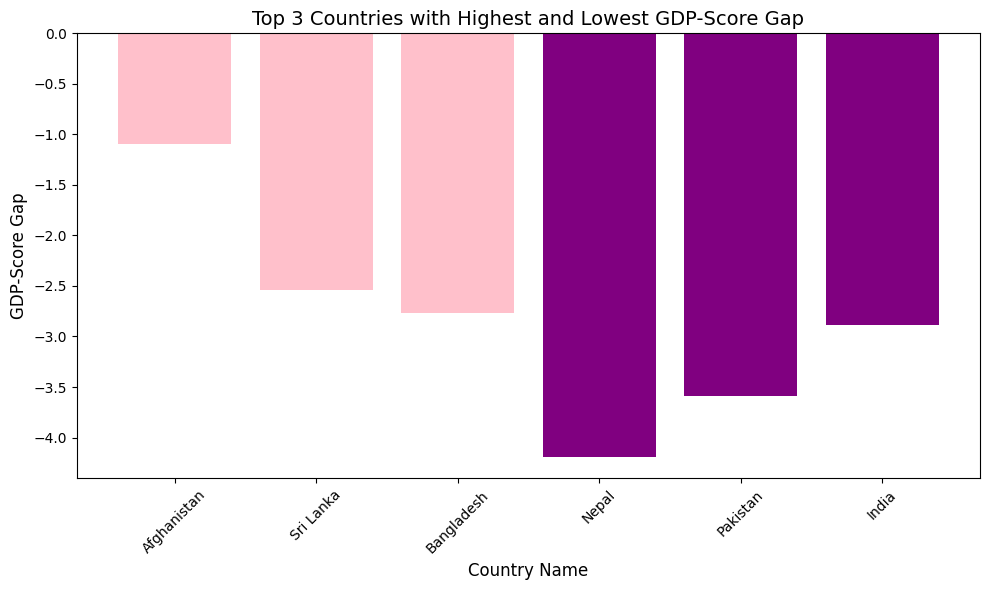

In [ ]:
#Task 5
import pandas as pd
import matplotlib.pyplot as plt

#1
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

#2
ascending_gap= south_asian_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=False)
print("Ranked by GDP-Score (Ascending):\n", ascending_gap[['Country name', 'GDP-Score Gap']].head(10))
print("\nRanked by GDP-Score (Descending):\n", descending_gap[['Country name', 'GDP-Score Gap']].head(10))

#3
top_3_positive_gap = descending_gap[['Country name', 'GDP-Score Gap']].head(3)
top_3_negative_gap = ascending_gap[['Country name', 'GDP-Score Gap']].head(3)

plt.figure(figsize=(10, 6))
combined_top_3 = pd.concat([top_3_positive_gap, top_3_negative_gap])
colors = ['pink']*3 + ['purple']*3
plt.bar(combined_top_3['Country name'], combined_top_3['GDP-Score Gap'], color=colors)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.title('Top 3 Countries with Highest and Lowest GDP-Score Gap', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.

The GDP-Score Gap analysis in South Asia shows that countries with high GDP but low happiness may suffer from inequality or lack of social support, while countries with low GDP but high happiness often have strong social systems and personal freedoms. High GDP doesn't always lead to happiness if wealth is unevenly distributed, while good healthcare, social support, and freedom can improve well-being even in poorer countries. Addressing both economic growth and social well-being is key to boosting happiness in the region.

Middle Eastern Countries Dataset:
              Country name
4                  Israel
12                 Kuwait
21   United Arab Emirates
27           Saudi Arabia
61                Bahrain
91                   Iraq
99                   Iran
124                Jordan
132                 Yemen
141               Lebanon

South Asia - Mean Happiness Score: 3.895666666666667
South Asia - Standard Deviation of Happiness Score: 1.1770690152521501
Middle East - Mean Happiness Score: 5.412100000000001
Middle East - Standard Deviation of Happiness Score: 1.5662011684327144

Middle East has a higher mean happiness score.


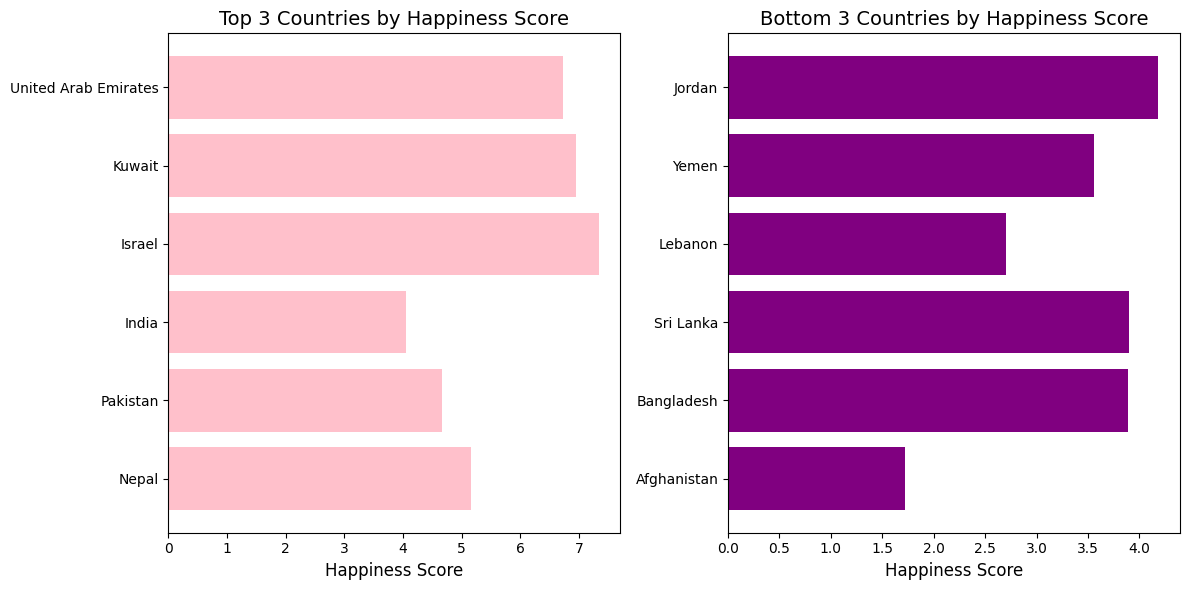

In [ ]:
#3 Comparative Analysis:
#Task 1
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
print("Middle Eastern Countries Dataset:\n", middle_east_df[['Country name']])

#1
mean_south_asia = south_asian_df['score'].mean()
std_south_asia = south_asian_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

print("\nSouth Asia - Mean Happiness Score:", mean_south_asia)
print("South Asia - Standard Deviation of Happiness Score:", std_south_asia)
print("Middle East - Mean Happiness Score:", mean_middle_east)
print("Middle East - Standard Deviation of Happiness Score:", std_middle_east)

#comparing the mean happiness scores
if mean_south_asia > mean_middle_east:
    print("\nSouth Asia has a higher mean happiness score.")
else:
    print("\nMiddle East has a higher mean happiness score.")

#2
top_3_south_asia = south_asian_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_south_asia = south_asian_df.nsmallest(3, 'score')[['Country name', 'score']]

top_3_middle_east = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

#combining top and bottom countries for plotting
top_3_combined = pd.concat([top_3_south_asia, top_3_middle_east])
bottom_3_combined = pd.concat([bottom_3_south_asia, bottom_3_middle_east])

#3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_countries = top_3_combined['Country name']
top_scores = top_3_combined['score']
plt.barh(top_countries, top_scores, color='pink')
plt.xlabel('Happiness Score', fontsize=12)
plt.title('Top 3 Countries by Happiness Score', fontsize=14)

plt.subplot(1, 2, 2)
bottom_countries = bottom_3_combined['Country name']
bottom_scores = bottom_3_combined['score']
plt.barh(bottom_countries, bottom_scores, color='purple')
plt.xlabel('Happiness Score', fontsize=12)
plt.title('Bottom 3 Countries by Happiness Score', fontsize=14)

plt.tight_layout()
plt.show()

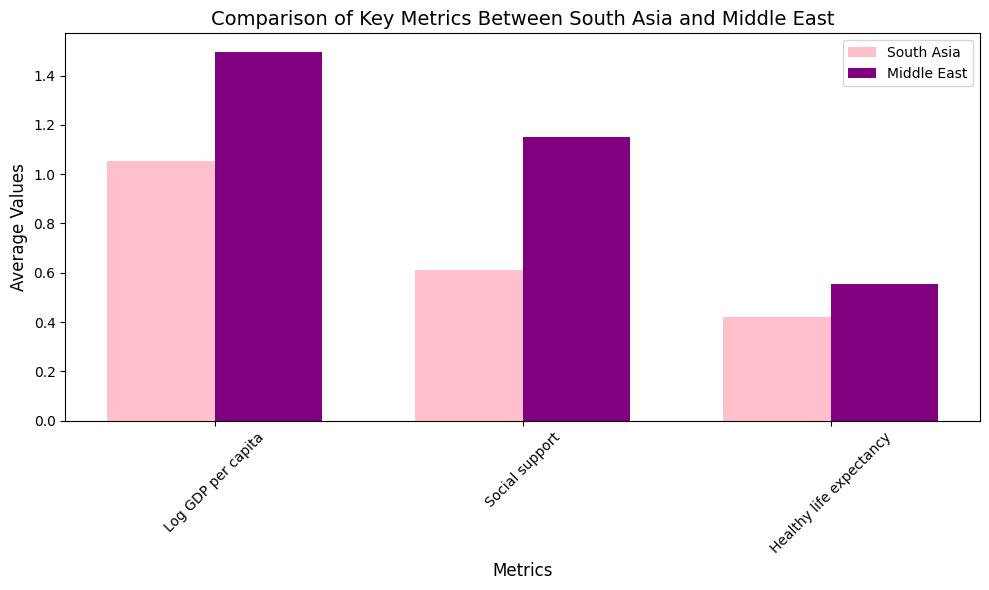

The metric with the largest disparity between South Asia and Middle East is Social support with a difference of 0.5409444444444443.


In [ ]:
#3
import numpy as np
import matplotlib.pyplot as plt

#calculating average values for each region
south_asian_avg = south_asian_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_avg = middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

#labels for the metrics
labels = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_values = south_asian_avg.values
middle_east_values = middle_east_avg.values
bar_width = 0.35
index = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, south_asia_values, bar_width, label='South Asia', color='pink')  # Shift South Asia bars
plt.bar(index + bar_width/2, middle_east_values, bar_width, label='Middle East', color='purple')  # Shift Middle East bars

#title and labels
plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.xticks(index, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#calculating disparities between the two regions for each metric
gdp_diff = abs(south_asian_avg['Log GDP per capita'] - middle_east_avg['Log GDP per capita'])
social_support_diff = abs(south_asian_avg['Social support'] - middle_east_avg['Social support'])
healthy_life_expectancy_diff = abs(south_asian_avg['Healthy life expectancy'] - middle_east_avg['Healthy life expectancy'])

#storing disparities in a dictionary
disparity = {
    'Log GDP per capita': gdp_diff,
    'Social support': social_support_diff,
    'Healthy life expectancy': healthy_life_expectancy_diff
}

#find the metric with the largest disparity
max_disparity_metric = max(disparity, key=disparity.get)
max_disparity_value = disparity[max_disparity_metric]
print(f"The metric with the largest disparity between South Asia and Middle East is {max_disparity_metric} with a difference of {max_disparity_value}.")

In [ ]:
#4
south_asian_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asian_score_mean = south_asian_df['score'].mean()
south_asian_score_std = south_asian_df['score'].std()
south_asian_cv = (south_asian_score_std / south_asian_score_mean) * 100

#computing the range and coefficient of variation for Score in Middle East
middle_east_score_mean = middle_east_df['score'].mean()
middle_east_score_std = middle_east_df['score'].std()
middle_east_cv = (middle_east_score_std / middle_east_score_mean) * 100

print(f"South Asia - Happiness Score Range: {south_asian_score_range:.2f}, CV: {south_asian_cv:.2f}%")
print(f"Middle East - Happiness Score Range: {middle_east_score_range:.2f}, CV: {middle_east_cv:.2f}%")

#comparing the variability
if south_asian_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness.")
else:
    print("\nMiddle East has greater variability in happiness.")

South Asia - Happiness Score Range: 3.44, CV: 30.21%
Middle East - Happiness Score Range: 4.63, CV: 28.94%

South Asia has greater variability in happiness.


South Asia - Correlation between Score and Freedom to Make Life Choices: 0.80
South Asia - Correlation between Score and Generosity: 0.87
Middle East - Correlation between Score and Freedom to Make Life Choices: 0.86
Middle East - Correlation between Score and Generosity: 0.63


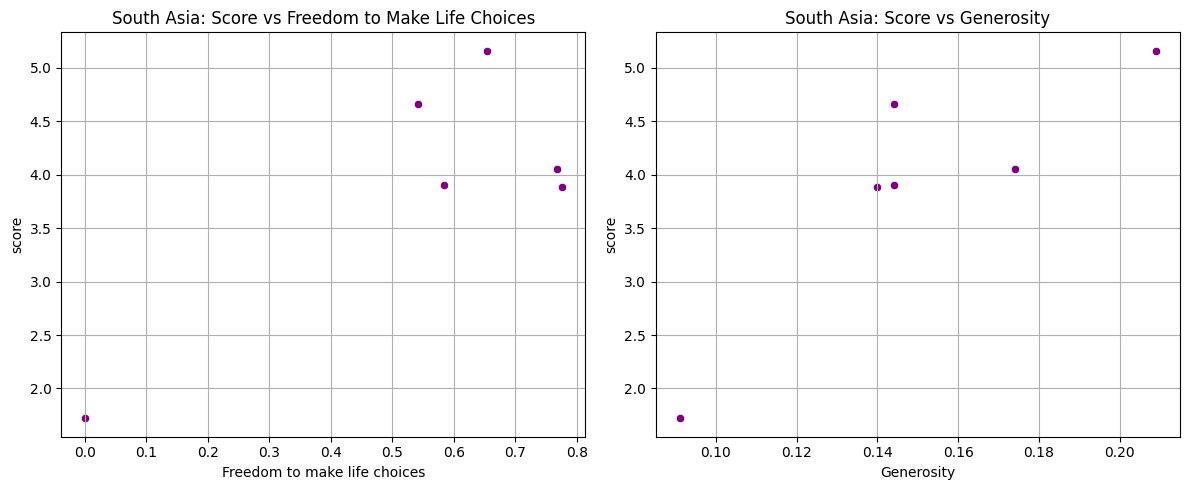

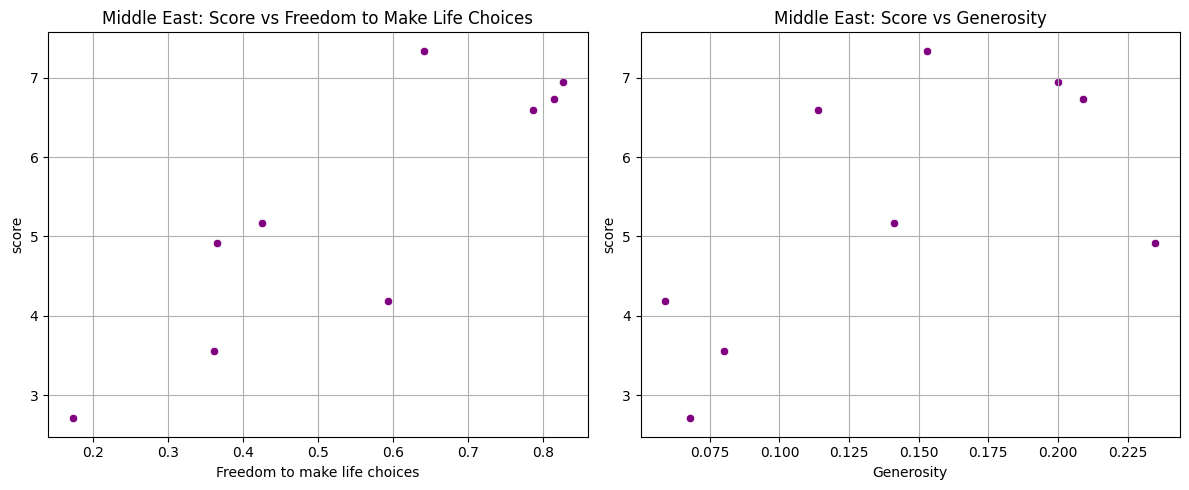

In [ ]:
#5
import matplotlib.pyplot as plt
import seaborn as sns

#calculating Pearson correlation
south_asian_freedom_corr = south_asian_df['score'].corr(south_asian_df['Freedom to make life choices'])
south_asian_generosity_corr = south_asian_df['score'].corr(south_asian_df['Generosity'])
middle_east_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print(f"South Asia - Correlation between Score and Freedom to Make Life Choices: {south_asian_freedom_corr:.2f}")
print(f"South Asia - Correlation between Score and Generosity: {south_asian_generosity_corr:.2f}")
print(f"Middle East - Correlation between Score and Freedom to Make Life Choices: {middle_east_freedom_corr:.2f}")
print(f"Middle East - Correlation between Score and Generosity: {middle_east_generosity_corr:.2f}")

#scatter plot for South Asia: Score vs Freedom to Make Life Choices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df, color='purple')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.grid(True)

#scatter plot for South Asia: Score vs Generosity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df, color='purple')
plt.title('South Asia: Score vs Generosity')
plt.grid(True)
plt.tight_layout()
plt.show()

#scatter plot for Middle East: Score vs Freedom to Make Life Choices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='purple')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.grid(True)

#scatter plot for Middle East: Score vs Generosity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df, color='purple')
plt.title('Middle East: Score vs Generosity')
plt.grid(True)
plt.tight_layout()
plt.show()

South Asia - Outliers based on Score and GDP:
     Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East - Outliers based on Score and GDP:
 Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


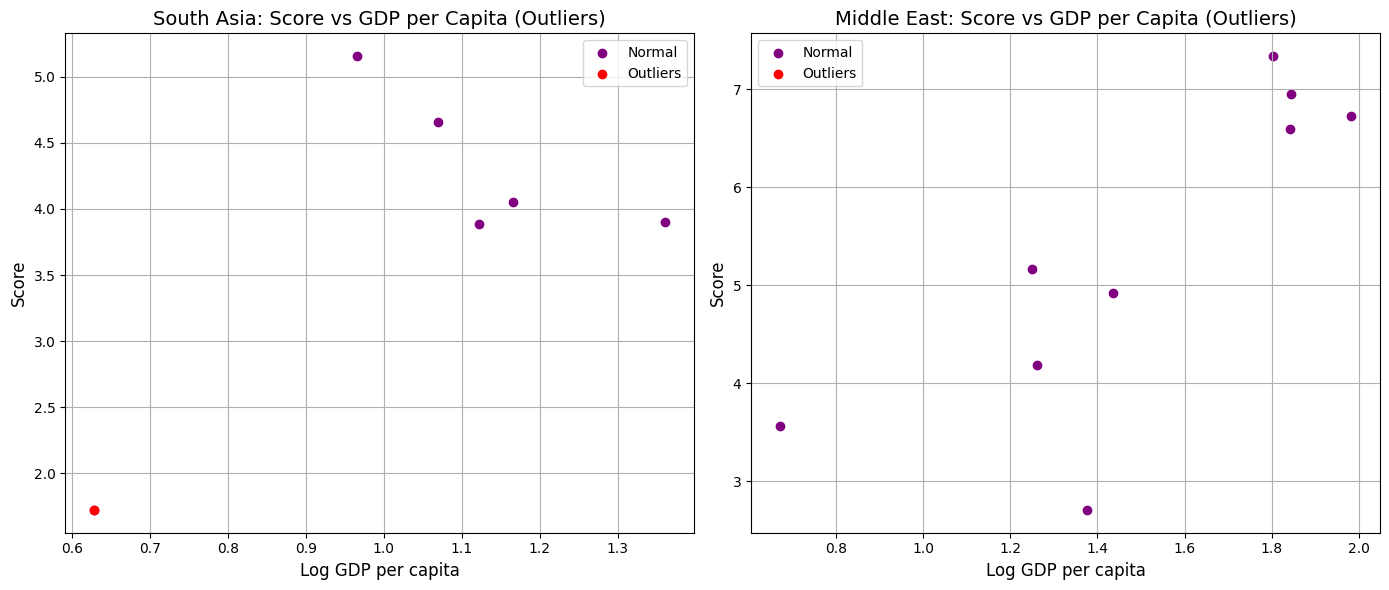

In [ ]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

#outlier detection for South Asia based on Score and GDP per Capita
score_Q1_south = south_asian_df['score'].quantile(0.25)
score_Q3_south = south_asian_df['score'].quantile(0.75)
score_IQR_south = score_Q3_south - score_Q1_south

gdp_Q1_south = south_asian_df['Log GDP per capita'].quantile(0.25)
gdp_Q3_south = south_asian_df['Log GDP per capita'].quantile(0.75)
gdp_IQR_south = gdp_Q3_south - gdp_Q1_south

lower_bound_score_south = score_Q1_south - 1.5 * score_IQR_south
upper_bound_score_south = score_Q3_south + 1.5 * score_IQR_south

lower_bound_gdp_south = gdp_Q1_south - 1.5 * gdp_IQR_south
upper_bound_gdp_south = gdp_Q3_south + 1.5 * gdp_IQR_south

#identifying outliers for South Asia
outliers_score_south = south_asian_df[(south_asian_df['score'] < lower_bound_score_south) | (south_asian_df['score'] > upper_bound_score_south)]
outliers_gdp_south = south_asian_df[(south_asian_df['Log GDP per capita'] < lower_bound_gdp_south) | (south_asian_df['Log GDP per capita'] > upper_bound_gdp_south)]
outliers_south = pd.concat([outliers_score_south, outliers_gdp_south]).drop_duplicates()

#identifying outliers for Middle East
score_Q1_middle = middle_east_df['score'].quantile(0.25)
score_Q3_middle = middle_east_df['score'].quantile(0.75)
score_IQR_middle = score_Q3_middle - score_Q1_middle

gdp_Q1_middle = middle_east_df['Log GDP per capita'].quantile(0.25)
gdp_Q3_middle = middle_east_df['Log GDP per capita'].quantile(0.75)
gdp_IQR_middle = gdp_Q3_middle - gdp_Q1_middle

lower_bound_score_middle = score_Q1_middle - 1.5 * score_IQR_middle
upper_bound_score_middle = score_Q3_middle + 1.5 * score_IQR_middle
lower_bound_gdp_middle = gdp_Q1_middle - 1.5 * gdp_IQR_middle
upper_bound_gdp_middle = gdp_Q3_middle + 1.5 * gdp_IQR_middle

#identifying outliers for Middle East
outliers_score_middle = middle_east_df[(middle_east_df['score'] < lower_bound_score_middle) | (middle_east_df['score'] > upper_bound_score_middle)]
outliers_gdp_middle = middle_east_df[(middle_east_df['Log GDP per capita'] < lower_bound_gdp_middle) | (middle_east_df['Log GDP per capita'] > upper_bound_gdp_middle)]
outliers_middle = pd.concat([outliers_score_middle, outliers_gdp_middle]).drop_duplicates()
print("South Asia - Outliers based on Score and GDP:\n", outliers_south[['Country name', 'score', 'Log GDP per capita']])
print("\nMiddle East - Outliers based on Score and GDP:\n", outliers_middle[['Country name', 'score', 'Log GDP per capita']])

#visualization
plt.figure(figsize=(14, 6))

#South Asia Score vs GDP Outliers
plt.subplot(1, 2, 1)
plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='purple', label='Normal')
plt.scatter(outliers_south['Log GDP per capita'], outliers_south['score'], color='red', label='Outliers')
plt.title('South Asia: Score vs GDP per Capita (Outliers)', fontsize=14)
plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True)

#Middle East Score vs GDP Outliers
plt.subplot(1, 2, 2)
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='purple', label='Normal')
plt.scatter(outliers_middle['Log GDP per capita'], outliers_middle['score'], color='red', label='Outliers')
plt.title('Middle East: Score vs GDP per Capita (Outliers)', fontsize=14)
plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-45-7862396cfd37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df['Region'], middle_east_df['Region'] = 'South Asia', 'Middle East'
<ipython-input-45-7862396cfd37>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_dataset, palette=custom_palette)


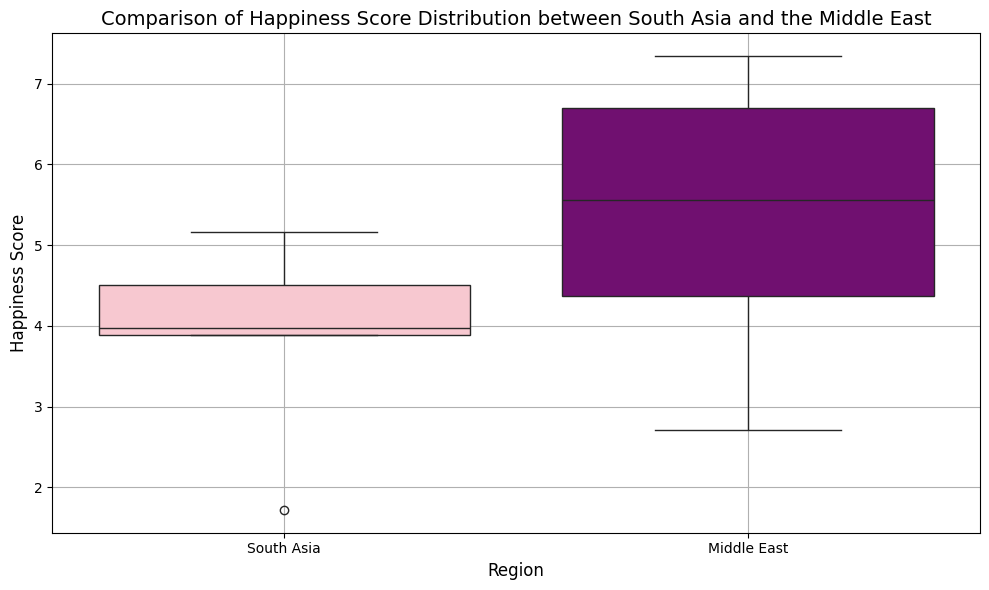

In [ ]:
#7
import matplotlib.pyplot as plt
import seaborn as sns

south_asian_df['Region'], middle_east_df['Region'] = 'South Asia', 'Middle East'
combined_dataset = pd.concat([south_asian_df[['score', 'Region']], middle_east_df[['score', 'Region']]])

plt.figure(figsize=(10, 6))
custom_palette = {'South Asia': 'pink', 'Middle East': 'purple'}
sns.boxplot(x='Region', y='score', data=combined_dataset, palette=custom_palette)

#title and labels
plt.title('Comparison of Happiness Score Distribution between South Asia and the Middle East', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()